In [40]:
from partCoordsOfImage import partCoordsOfImage

import cv2
import pylab as plt
import matplotlib
import numpy as np
import tensorflow as tf

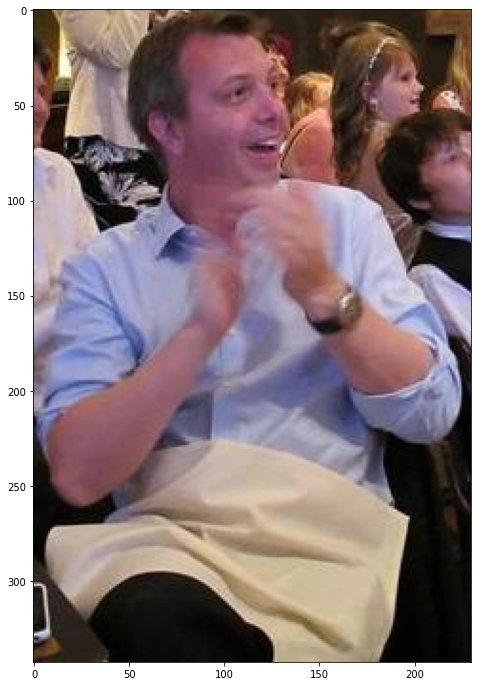

In [2]:
imgDir = 'sample_images/applauding_001.jpg'
img = cv2.imread(imgDir)
plt.imshow(img[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

In [4]:
partCoords = partCoordsOfImage(imgDir)

In [38]:
#partCoords

(343, 230, 3)


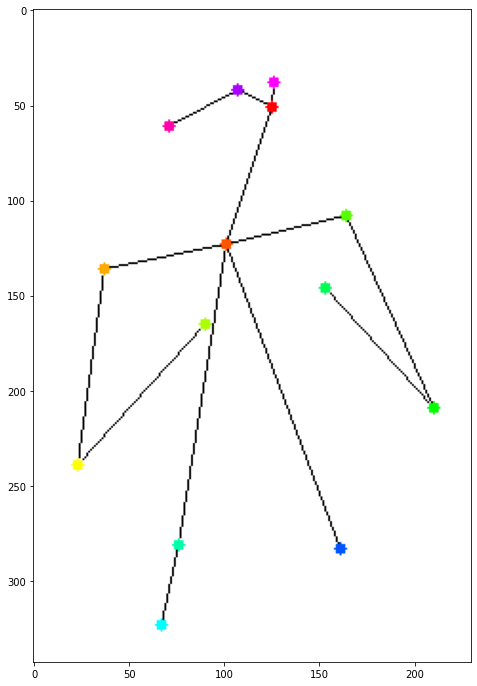

In [37]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

limbSeq = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7], [1,8], [8,9], \
           [9,10], [1,11], [11,12], [12,13], [1,0], [0,14], [14,16], \
           [0,15], [15,17], [5,17]]

#canvas = cv2.imread(imgDir)
print(img.shape)
canvas = np.full(img.shape,255,np.uint8)

#cv2.circle(canvas, (500,500), 40, colors[i], thickness=-1)

#cv2.line(canvas,(100,100),(200,200),[0,0,0],1)

for seq in limbSeq:
    if (not np.isnan(partCoords[seq[0]][0])) and (not np.isnan(partCoords[seq[1]][0])):
        cv2.line(canvas,
                 (int(partCoords[seq[0]][0]),int(partCoords[seq[0]][1])),
                 (int(partCoords[seq[1]][0]),int(partCoords[seq[1]][1])),
                 [0,0,0],
                 1)

for i in range(len(partCoords)):
    if (not np.isnan(partCoords[i][0])) and (not np.isnan(partCoords[i][1])):
        cv2.circle(canvas, (int(partCoords[i][0]),int(partCoords[i][1])), int(img.shape[0]/100), colors[i], thickness=-1)

plt.imshow(canvas)
        
#to_plot = cv2.addWeighted(img, 0.3, canvas, 0.7, 0)
#plt.imshow(to_plot[:,:,[2,1,0]])

#make bigger
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

In [57]:
print(partCoords)

[[0.54545455 0.04561404]
 [0.4171123  0.29824561]
 [0.07486631 0.34385965]
 [0.         0.70526316]
 [0.35828877 0.44561404]
 [0.7540107  0.24561404]
 [1.         0.6       ]
 [0.69518717 0.37894737]
 [0.28342246 0.85263158]
 [0.23529412 1.        ]
 [0.         0.        ]
 [0.73796791 0.85964912]
 [0.         0.        ]
 [0.         0.        ]
 [0.44919786 0.01403509]
 [0.55080214 0.        ]
 [0.25668449 0.08070175]
 [0.         0.        ]]


In [63]:
#normalize
partCoords[np.isnan(partCoords)] = 0

xmax, ymax = np.nanmax(partCoords, axis=0)
xmin, ymin = np.nanmin(partCoords, axis=0)
    
partCoords[:,0] -= xmin
partCoords[:,0] /= (xmax - xmin)
    
partCoords[:,1] -= ymin
partCoords[:,1] /= (ymax - ymin)


#load tensorflow lite model
interpreter = tf.lite.Interpreter(model_path='./saved_tflite_models/model_2.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], partCoords[np.newaxis,...].astype('float32'))
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

predictionIndex = np.argmax(output_data[0])

classOrder = np.load('classOrder.npy')

prediction = classOrder[predictionIndex]

print('Predicted class:',prediction)

Predicted class: drinking
